In [7]:
%%bash
ncdump data/model-gfs.nc

netcdf model-gfs {
dimensions:
	profile = 24 ;
	station = 1 ;
	isobaric3 = 1 ;
	station_name_strlen = 10 ;
	station_description_strlen = 33 ;
variables:
	float Convective_available_potential_energy_surface(station, profile) ;
		Convective_available_potential_energy_surface:standard_name = "Convective_available_potential_energy_surface" ;
		Convective_available_potential_energy_surface:long_name = "Convective_available_potential_energy_surface" ;
		Convective_available_potential_energy_surface:units = "J/kg" ;
		Convective_available_potential_energy_surface:coordinates = "time longitude latitude" ;
	float Convective_inhibition_surface(station, profile) ;
		Convective_inhibition_surface:standard_name = "Convective_inhibition_surface" ;
		Convective_inhibition_surface:long_name = "Convective_inhibition_surface" ;
		Convective_inhibition_surface:units = "J/kg" ;
		Convective_inhibition_surface:coordinates = "time longitude latitude" ;
	float Temperature_surface(station, profile) ;
		Temper

In [8]:
from netCDF4 import Dataset, num2date

In [96]:
data = Dataset('data/model-gfs.nc', 'r')

ImportError on netCDF4? 
From the command line:

with anaconda:
- conda install netCDF4 

with canopy:
- pip install netCDF
- pip install --upgrade netCDF



In [23]:
# get the time variable, and convert to datetimes
time_var = data.variables['time']
print time_var

<type 'netCDF4._netCDF4.Variable'>
float64 time(station, profile)
    units: Hour since 2015-07-14T00:00:00Z
    calendar: proleptic_gregorian
    standard_name: time
    long_name: GRIB forecast or observation time
unlimited dimensions: 
current shape = (1, 24)
filling on, default _FillValue of 9.96920996839e+36 used



In [13]:
num2date?

In [18]:
print time_var.units
print time_var[:]

Hour since 2015-07-14T00:00:00Z
[[  93.   96.   99.  102.  105.  108.  111.  114.  117.  120.  123.  126.
   129.  132.  135.  138.  141.  144.  147.  150.  153.  156.  159.  162.]]


In [25]:
time = num2date(time_var[:], time_var.units ).squeeze()
print time.shape

(24,)
(1, 24)


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

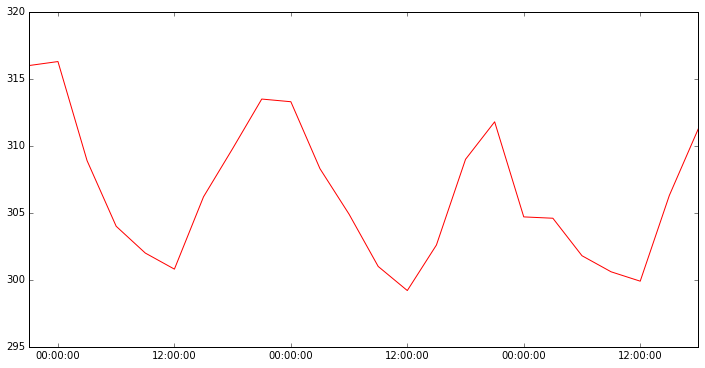

In [30]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
T_iso = data.variables['Temperature_isobaric']
ax.plot(time, T_iso[:].squeeze(), 'r-')

In [31]:
from datetime import datetime
print datetime.now()

2015-08-20 10:30:58.915760


In [75]:
def set_defaults(ax, label_font):

    ax.set_xlabel('Forecast time (UTC)', fontdict=label_font)

    from matplotlib.dates import DateFormatter, DayLocator, HourLocator
    ax.xaxis.set_major_locator(DayLocator())
    ax.xaxis.set_minor_locator(HourLocator(range(6,24,6)))

    ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
    ax.xaxis.set_minor_formatter(DateFormatter('%HZ'))

    # format code documentation is at (among other places): http://strftime.org

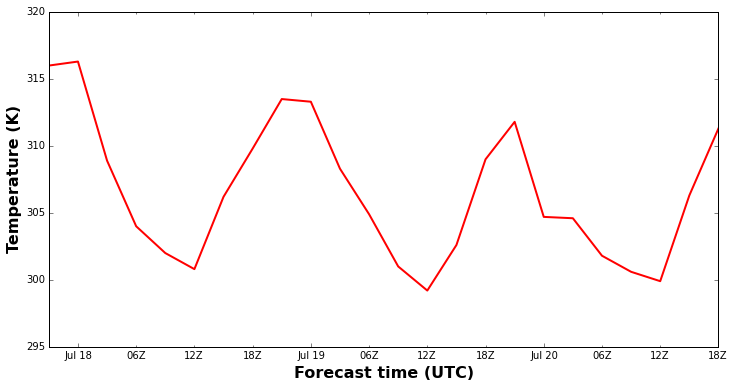

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(time, data.variables['Temperature_isobaric'][:].squeeze(), 'r-', linewidth=2)

set_defaults(ax)

In [53]:
vals = [1,2,3,4]
names = ['one', 'two','three','four']
pairs = zip(names,vals)


[('one', 1), ('two', 2), ('three', 3), ('four', 4)]


In [54]:
print zip(*pairs)

[('one', 'two', 'three', 'four'), (1, 2, 3, 4)]


In [64]:
a,b,c,d,e = 'ericb'
print c

i


In [65]:
import math
def polar_to_cartesian(r,th):
    x = r*math.cos(th)
    y = r*math.sin(th)
    return x, y

X, Y = polar_to_cartesian(2, math.pi/3)
print(X,Y)

(1.0000000000000002, 1.7320508075688772)


In [69]:
format_template = "{0} == {1}, which is the {0}th number"

for nv in zip(names, vals):
    print(format_template.format(*nv))

one == 1, which is the oneth number
two == 2, which is the twoth number
three == 3, which is the threeth number
four == 4, which is the fourth number


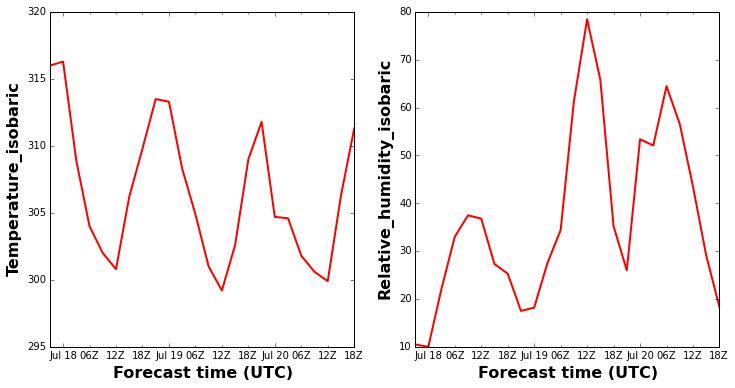

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
label_font = dict(size=16, weight='bold')

for ax, varname in zip(axes, ['Temperature_isobaric', 'Relative_humidity_isobaric']):
    ax.plot(time, data.variables[varname][:].squeeze(), 'r-', linewidth=2)
    set_defaults(ax, label_font) 
    ax.set_ylabel(varname, fontdict=label_font)

In [78]:
num_map = dict(zip(vals, names))
print num_map

{1: 'one', 2: 'two', 3: 'three', 4: 'four'}


In [80]:
print num_map[1]

one


In [83]:
states = dict(Colorado={'abbreviation': 'CO', 'capitol': 'Denver', 'notes': 'Home!', 'flat':False},
              Oklahoma={'abbreviation': 'OK', 'capitol': 'Oklahoma City', 'flat': True},
              Kansas={'abbreviation': 'KS', 'capitol': 'Topeka', 'flat': True})

In [84]:
states['Colorado']['capitol']

'Denver'

In [92]:
def K2F(K):
    return 1.8 * (K-273.15) + 32

print K2F(300)
print K2F

80.33
<function K2F at 0x10c424938>


In [100]:
variable_styles = {'Temperature_isobaric':{'line':dict(color='r', marker='s', linestyle='-'),
                                           'label':u'Temperature (°F)', 'converter':K2F},
                   'Relative_humidity_isobaric': {'line':dict(color='g', marker='o'),
                                           'label':'RH (%)', 'converter':None}}

In [101]:
print variable_styles['Temperature_isobaric']['line']
print variable_styles['Relative_humidity_isobaric']['label']

{'marker': 's', 'color': 'r', 'linestyle': '-'}
RH (%)


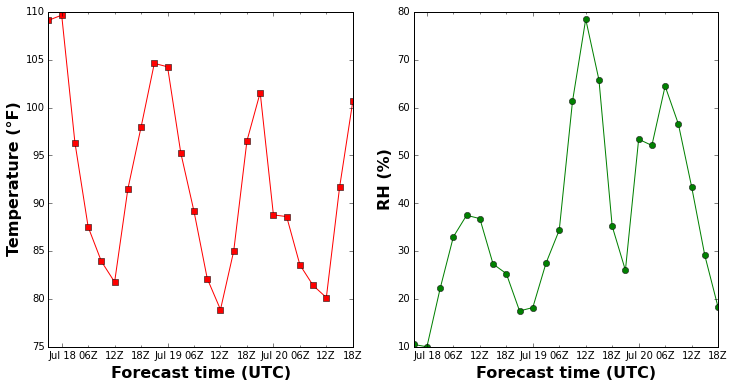

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
label_font = dict(size=16, weight='bold')
vars_to_plot = ['Temperature_isobaric', 'Relative_humidity_isobaric']

for ax, varname in zip(axes, vars_to_plot):
    data_vals = data.variables[varname][:].squeeze()
    
    # get the converter from the dictionary
    converter = variable_styles[varname]['converter']
    if converter is not None:
        # do something to the data if there is a converter
        data_vals = converter(data_vals)
        
    linespec = variable_styles[varname]['line']
    ax.plot(time, data_vals, **linespec)
    set_defaults(ax, label_font) 
    ax.set_ylabel(variable_styles[varname]['label'], fontdict=label_font)

What are good resources for further learning?
Learning Python
Python Essential Reference